### Singapore AirBnB

The dataset consists of information on AirBnB reservations in Singapore. The original data set can be downloaded in [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website and the data set used in this project is a cleaned version downloaded from [Kaggle.com](https://www.kaggle.com/jojoker/singapore-airbnb). 

In this project, data set will be analyzed using Pandas, and Numpy libraires. Seaborn and Folium librarires will be used to visualize the patterns in the data set. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
# Import data
data = pd.read_csv('listings.csv')

In [3]:
# First five columns of the dataset
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


The id column represents the number of each reservation and the other columns provide information on each reservation. There are several points that seems interesting to explore in this dataset. In the 'name' column, the first and third reservations are set to the same host with two different names. it would be interesting to see explore how many names are there for each host. Reviews columns provide a different dimension on AirBNB reservations for the analysis. Further, one more interesting part of the project will be visualizing and analyzing the spatial attribute of the data, because analyzing the spatial attributes of the dataset will reveal additional insights about the data set.      

Let's start with exploring the basics information and statistics of the dataset.

In [4]:
# Dimensions of the dataset
data.shape

(7907, 16)

The data set consists of 7907 AirBnB reservations and 16 attributes on each reservation. 

In [5]:
# Column names of the dataset
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
# Data type of each column
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# Descriptives statistics
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


The descriptive statistics are calculated only for the numerical attributes. 

In [8]:
# No data values in the dataset
data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

The data set has two missing values in the name column, these reservations should be able to use in the analysis as all the other information are available. Two columns related to reviews contain about 35% of no data values. It is possible that many people did not provide any reviews. Also the number of missing values of the both columns are equal, which would be interesting to explore.  

In [9]:
# Maximum and minimum prices of AirBnBs
print(data.price.min(),data.price.max())

0 10000


The maximum price of the reservations is 10000, while the 75th percentile is only 199 (from the descriptive statistics table). 

In [10]:
# number of hosts
data.host_id.nunique()

2705

In [11]:
# Number of neighborhod groups
data.neighbourhood_group.nunique()

5

In [12]:
# Group data according to the neighborhood group
df= data.groupby(data['neighbourhood_group'],as_index=False).sum()
df

,neighbourhood_group,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Central Region,152172738363,584677940279,8224.60417,655195.88995,1114355,96798,82255,4471.81,298442,1359184
1,East Region,9641046574,40468531122,675.67165,52796.43309,72392,13026,9562,376.73,6224,88359
2,North Region,4584664393,17727329530,289.55189,21178.02567,22599,5899,1910,115.81,3045,43622
3,North-East Region,6923203606,28773566486,475.70932,35942.43077,34544,10979,4157,212.48,1062,57954
4,West Region,11612202010,49034624737,725.78279,56019.58295,95026,11750,3384,197.02,12312,101280


<AxesSubplot:xlabel='neighbourhood_group'>

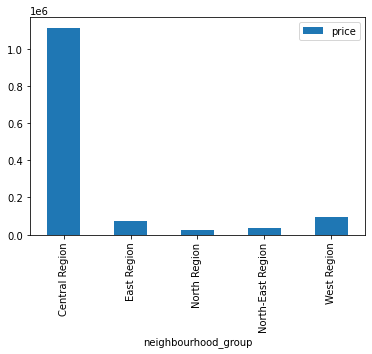

In [13]:
# Total money spent for AirBnb in different neighborhood regions
df.plot.bar(x='neighbourhood_group', y='price')

<AxesSubplot:xlabel='neighbourhood_group'>

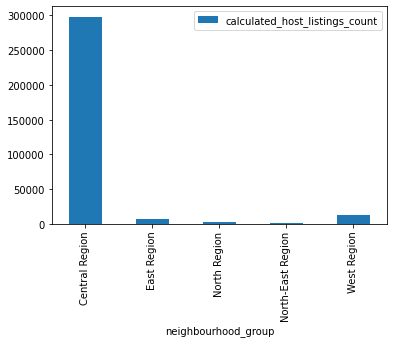

In [14]:
# Total money spent for AirBnb in different neighborhood regions
df.plot.bar(x='neighbourhood_group', y='calculated_host_listings_count')

In [15]:
# Create a longitude latitude list to plot in a map
a= data.latitude.values
b= data.longitude.values

latlon = zip(a,b)
latlon = list(latlon)

# select a random subset of 75 locations to reduce plotting time
from random import sample
latlon = sample(latlon,75)

In [16]:
# Create a map object and draw the subset points on the map
mapit = folium.Map( location=[1.33235, 103.78521], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

mapit

In [17]:
# Create a folium object with a different map time
m = folium.Map(location=[1.33235, 103.78521], tiles='stamentoner', zoom_start=6)

# Create a heatmap using the data subset
HeatMap(latlon).add_to(m)
m